Installing Required Libraries for Extracting, Transforming and Loading of Dataset. Also, for building and training the Model

In [0]:
import pandas as pd
import tensorflow as tf
import csv
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Importing a CSV File as a Pandas Dataframe

In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/solar_data.csv")

Displaying first five entries of the Dataset

In [0]:
df.head()

,Temperature,Humidity,Voltage,Current,Irradiance,Power
0,27.195719,66.0,21.282369,0.5,361.544259,10.641180
1,27.757916,67.0,16.631721,0.5,274.344744,8.315860
2,27.208126,72.0,16.507953,0.5,272.024102,8.253976
3,27.654181,77.0,18.733525,0.5,313.753533,9.366761
4,29.356662,71.0,19.942582,0.5,336.423315,9.971288


Shuffling the data in the Dataset and spliting it into Training set and Test set as specified

In [0]:
train, test = train_test_split(df, test_size = 0.1)

Displaying first five entries of the Training Dataset

In [0]:
train.head()

,Temperature,Humidity,Voltage,Current,Irradiance,Power
4456,31.513035,72.0,22.760193,0.5,389.253330,11.380089
193,27.766926,77.0,20.510092,0.5,347.064110,10.255043
1441,35.921201,73.0,23.676230,0.5,406.428885,11.838104
4687,34.503689,70.0,19.426503,0.5,326.746861,9.713250
2531,31.203788,71.0,19.055501,0.5,319.790585,9.527749


Displaying first five entries of the Testing Dataset

In [0]:
test.head()

,Temperature,Humidity,Voltage,Current,Irradiance,Power
981,31.896380,75.0,24.897630,0.499999,429.329871,12.448797
1986,27.237622,72.0,23.614884,0.500000,405.278661,11.807431
682,27.291991,70.0,17.455371,0.500000,289.788180,8.727685
2712,36.035601,69.0,17.815208,0.500000,296.535112,8.907603
1792,34.726853,81.0,19.772277,0.500000,333.230100,9.886136


Seperating Inputs and Labels from the Training and Testing Data by converting Pandas Dataframe into Numpy Arrays

In [0]:
train = np.array(train)
test = np.array(test)
x_train = np.delete(train, 5, axis = 1)
y_train = train[:,5]
x_test = np.delete(test, 5, axis = 1)
y_test = test[:,5]

Converting Numpy arrays into Tensors

In [0]:
x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

Building Model with 5 input, 4 hidden and 1 output layer.

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(units = 4, input_shape = [5]),
                                    tf.keras.layers.Dense(units = 1)
                                   ])

Displaying the structure of the Neural Model

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


Compiling the Model with appropriate Optimizer and Loss Function

In [0]:
model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  )

Training the Model on the Training Data

In [0]:
history = model.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test))

Epoch 1/100
141/141 [==============================] - 0s 2ms/step - loss: 6990.9932 - val_loss: 378.8918
Epoch 2/100
141/141 [==============================] - 0s 1ms/step - loss: 288.8671 - val_loss: 290.7594
Epoch 3/100
141/141 [==============================] - 0s 1ms/step - loss: 265.3039 - val_loss: 272.8586
Epoch 4/100
141/141 [==============================] - 0s 1ms/step - loss: 247.3807 - val_loss: 252.0204
Epoch 5/100
141/141 [==============================] - 0s 1ms/step - loss: 227.5963 - val_loss: 230.3520
Epoch 6/100
141/141 [==============================] - 0s 1ms/step - loss: 206.7512 - val_loss: 207.8629
Epoch 7/100
141/141 [==============================] - 0s 1ms/step - loss: 185.9090 - val_loss: 185.5994
Epoch 8/100
141/141 [==============================] - 0s 1ms/step - loss: 164.9316 - val_loss: 163.7668
Epoch 9/100
141/141 [==============================] - 0s 1ms/step - loss: 144.7621 - val_loss: 142.9308
Epoch 10/100
141/141 [==============================] 

Evaluating the Model on the Test Set

In [0]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 0s 1ms/step - loss: 1.4701e-04


0.00014700544124934822

Displaying the Training and Validation loss over no. of Epochs

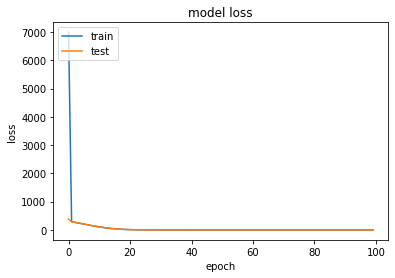

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving the model as yaml File for reusing

In [0]:
from keras.models import model_from_yaml
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
model.load_weights("model.h5")
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


Converting the saved Model to Tensorflow Lite to be loaded on to a Raspberry Pi

In [0]:
model_yaml = tf.keras.models.load_model('/content/model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model_yaml)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

1012